In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep
import pandas as pd

#Openning a chrome tab via the url of the website
URL = 'https://carwiz.co.il/used-cars'
driver = webdriver.Chrome()
driver.get(URL)
div_class = "car-details-button"
#Filltering all relevant buttons using a class name unique to it "car-details-button"
sleep(2)
total_height = driver.execute_script("return document.body.scrollHeight")
i = 0
cars_hrefs = []
while(i<1500000):
    cars = driver.find_elements(By.CLASS_NAME, div_class)
    for element in cars:
        href = element.get_attribute('href')
        cars_hrefs.append(href)
    driver.execute_script(f'window.scrollTo({i}, {i+600});')
    sleep(2)
    i = i + 600
#Creating a loop using selenium command to scroll down the page and obtaining all buttons
cars_set = set(cars_hrefs)
#Creating a set to preven duplicates.
print(len(cars_set))


print (cars_set)
driver.quit()

links_list = list(cars_set)
links_df = pd.DataFrame({'links': links_list})
links_df.to_csv("new_links_table.csv")
#Making the set into a list in order to transfer the information in a DataFrame (set can not be made in to a DataFrame).
#Saving the data for later use

In [ ]:
first_half = pd.DataFrame(links_df.iloc[0:1921])
first_half
seconed_half = pd.DataFrame(links_df.iloc[1921:3842])
seconed_half
first_half.to_csv("first_half.csv")
seconed_half.to_csv("seconed_half.csv")
#splitting the data in half to make it easier and faster to collect info.

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from time import sleep
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

first_half = pd.read_csv('first_half.csv')
first_half
#Necessary imports and load of the file we will work with 
#p.s the same had been done with the other half.

,Unnamed: 0,links
0,0,https://carwiz.co.il/used-cars/69a12ef2-3c88-4...
1,1,https://carwiz.co.il/used-cars/6592c44b-9aa5-4...
2,2,https://carwiz.co.il/used-cars/f23042f3-6944-4...
3,3,https://carwiz.co.il/used-cars/300ce931-e538-4...
4,4,https://carwiz.co.il/used-cars/be89bbbc-f648-4...
...,...,...
1916,1916,https://carwiz.co.il/used-cars/27dbecfc-a18c-4...
1917,1917,https://carwiz.co.il/used-cars/b2a9d07d-aec0-4...
1918,1918,https://carwiz.co.il/used-cars/ce0887c2-560e-4...
1919,1919,https://carwiz.co.il/used-cars/f9bb9582-9113-4...


In [ ]:
price = []
city = []
version = []
year = []
engine = []
km = []
owner_num = []
gear_type = []
color = []
origin_own = []
nxt_test = []
test_cost = []
params = {"version": version,"year": year, "engine": engine, "km": km, "owner_num": owner_num,
          "gear_type": gear_type, "color": color, "origin_own": origin_own, "nxt_test": nxt_test, "test_cost": test_cost}
#Arrays for each of the values that will be scraped.
#Dictionary will be used to collect the data that is attached in the same web element later on.


In [ ]:
counter = 0
#This is a dinamic website therfor add can be removed or cars will be sold in other words
#Counter will tell us how many of those links have failed

for item in first_half["links"]:
    driver = webdriver.Chrome()
    driver.get(item)
    sleep(1)
#Going over all of the links in each hlaf    
    
    try :
#We will try to locate the element needed for us and if so we will start the proceses
        element_table = WebDriverWait(driver,2).until
        EC.presence_of_element_located ((By.CLASS_NAME,'css-167aqw2'))
        details_table = driver.find_element(By.CLASS_NAME, 'css-167aqw2')
        car_price = driver.find_element(By.CLASS_NAME, 'css-6n7j50').text
        location = driver.find_element(By.CLASS_NAME, 'css-19hvzpm').text
        data_vars = []
#Creating a test array
        price.append(car_price)
        city.append(location)
        table_rows = details_table.find_elements(By.TAG_NAME, 'tr')
        for row in table_rows:
#There is a chance of missing row in this table so using data_vars we will check what is missing
            data_type = row.find_element(By.XPATH, 'td[1]').text
            data_val = row.find_element(By.XPATH, 'td[2]').text
            if (data_type == "גירסה"):
                version.append(data_val)
                data_vars.append('version')
            elif (data_type == "שנה"):
                year.append(data_val)
                data_vars.append('year')
            elif (data_type == "מנוע"):
                engine.append(data_val)
                data_vars.append('engine')
            elif (data_type == "קילומטר נוכחי"):
                km.append(data_val)
                data_vars.append('km')
            elif (data_type == "יד"):
                owner_num.append(data_val)
                data_vars.append('owner_num')
            elif (data_type == "תיבת הילוכים"):
                gear_type.append(data_val)
                data_vars.append('gear_type')
            elif (data_type == "צבע"):
                color.append(data_val)
                data_vars.append('color')
            elif (data_type == "בעלות מקורית"):
                origin_own.append(data_val)
                data_vars.append('origin_own')
            elif (data_type == "טסט הבא בעוד"):
                nxt_test.append(data_val)
                data_vars.append('nxt_test')
            elif (data_type == "אגרת רישוי שנתית"):
                test_cost.append(data_val)
                data_vars.append('test_cost')
                
#Filling the origingal array and looking for missing data                
        for var in params:
            if var not in data_vars:
                params[var].append(0)
#If data is missing the Default is (0) for there are no 0 any other place.
       
    except :
        
        counter = counter + 1 
        
    
        
    finally : 
                
        driver.quit()
                

print (counter)



In [ ]:
for i in range(1, len(price)):
    if price[i] < price[i-1]:
        print i
#checking for duplicates

In [ ]:
print (len(price))
print (len(city))
print (len(year))
print (len(version))
print (len(engine))
print (len(km))
print (len(owner_num))
print (len(gear_type))
print (len(color))
print (len(origin_own))
print (len(nxt_test))
print (len(test_cost))
#Printing all of the arrays len in order to make sure the are all the same length and equal to all_ling_counter

In [ ]:
price_df = pd.DataFrame({'price': price})
city_df = pd.DataFrame({'city': city})
version_df = pd.DataFrame({'version': version})
year_df = pd.DataFrame({'year': year})
engine_df = pd.DataFrame({'engine': engine})
km_df = pd.DataFrame({'km': km})
owner_num_df = pd.DataFrame({'owner_num': owner_num})
gear_type_df = pd.DataFrame({'gear_type': gear_type})
color_df = pd.DataFrame({'color': color})
origin_own_df = pd.DataFrame({'origin_own': origin_own})
nxt_test_df = pd.DataFrame({'nxt_test': nxt_test})
test_cost_df = pd.DataFrame({'test_cost': test_cost})
price_df.to_csv("new_price.csv")
city_df.to_csv("new_city.csv")
version_df.to_csv("new_version.csv")
year_df.to_csv("new_year.csv")
engine_df.to_csv("new_engine.csv")
km_df.to_csv("new_km.csv")
owner_num_df.to_csv("new_owner_num.csv")
gear_type_df.to_csv("new_gear_type.csv")
color_df.to_csv("new_color.csv")
origin_own_df.to_csv("new_origin_own.csv")
nxt_test_df.to_csv("new_nxt_test.csv")
test_cost_df.to_csv("new_test_cost.csv")
#Converting each array in to a data fram and saving it just in case.
df = pd.DataFrame({"price": price,"location" : city, "version": version,"year": year, "engine": engine, "km": km, "owner_num": owner_num,
          "gear_type": gear_type, "color": color, "origin_own": origin_own, "nxt_test": nxt_test, "test_cost": test_cost})

df.to_csv("all_info.csv")
#Assambeling the arrays into a DataFrame





In [134]:
all_info = pd.read_csv('all_info.csv')
df2 = pd.read_csv('sec_part_info.csv')
df_all=pd.concat([all_info,df2])

#creating a dataframe containing all info

In [135]:
import numpy as np
df_all = pd.read_csv("full1.csv")
df_all

,Unnamed: 0.1,Unnamed: 0,price,location,version,year,engine,km,owner_num,gear_type,color,origin_own,nxt_test,test_cost,city
0,0,1,"138,000 ₪",עפולה,מזדה CX-5 CX-5 PREMIUM,2018,1998 ליטר בנזין,"55,000",4,אוטומטי,אפור מטל,ליסינג,6 חודשים,"2,019 ₪",NaN
1,1,2,"117,500 ₪",מאיפה שנוח לך בארץ,יונדאי טוסון TUCSON PRIME PLUS,2019,1999 ליטר בנזין,"84,971",1,אוטומטי,לבן,אחר,0,"1,835 ₪",NaN
2,2,3,"115,000 ₪",לוד,קיה ספורטז' SPORTAGE URBAN,2018,1999 ליטר בנזין,"27,000",3,אוטומטי,שחור,פרטית,4 חודשים,"1,835 ₪",NaN
3,3,4,"69,900 ₪",נתניה,שברולט ספארק SPARK LT PLUS,2021,1399 ליטר בנזין,"11,000",1,אוטומטי,שחור מטלי,פרטית,0,"1,235 ₪",NaN
4,4,5,"20,000 ₪",כפר סבא,אופל אסטרה ASTRA ENJOY,2012,1598 ליטר בנזין,"220,000",2,אוטומטי,אפור,ליסינג,4 חודשים,"1,262 ₪",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,3777,3778,"104,900 ₪",NaN,רנו מגאן MEGANE INTENSE,2019,1461 ליטר דיזל,"80,000",2,אוטומטי,שנהב לבן,ליסינג,5 חודשים,"1,604 ₪",ראשון לציון
3778,3778,3779,"155,000 ₪",NaN,קיה נירו NIRO EX,2017,1580 ליטר בנזין,"90,209",1,אוטומטי,כסף,פרטית,11 חודשים,"1,424 ₪",נתניה
3779,3779,3780,"115,900 ₪",NaN,הונדה סיוויק TOURER COMFORT,2015,1798 ליטר בנזין,"159,100",2,אוטומטי,אדום כהה (יין),פרטית,0,"1,424 ₪",פתח תקווה
3780,3780,3781,"105,000 ₪",NaN,ניסאן X TRAIL X-TRAIL TEKNA,2017,1598 ליטר דיזל,"95,000",2,אוטומטי,אדום,פרטית,11 חודשים,0,חיפה


In [136]:
df_all['location'] = df_all['location'].fillna(df_all['city'])
#Due to making to seprate dataframes and combaining it,same columns had diffrant name 

In [ ]:
#Cleaning irelevent coulumns 
df_all = df_all.drop('city', axis=1)
df_all = df_all.drop('Unnamed: 0', axis=1)
df_all = df_all.drop('Unnamed: 0.1', axis=1)
df_all.to_csv("clean_info.csv")
df_all

In [139]:
df_all = pd.read_csv("clean_info.csv")
df_all

In [166]:
df_all["nxt_test"].value_counts()
#We have seen due to the "for" loop above that some of the values are not found and should be deleted

1 חודשים     370
4 חודשים     287
3 חודשים     285
5 חודשים     276
11 חודשים    252
2 חודשים     244
6 חודשים     239
8 חודשים     187
7 חודשים     146
9 חודשים     123
10 חודשים     93
12 חודשים     58
13 חודשים     12
Name: nxt_test, dtype: int64

In [167]:
df_all["test_cost"].value_counts()

1,604 ₪    407
2,019 ₪    245
1,835 ₪    216
1,424 ₪    185
1,102 ₪    157
1,693 ₪    133
1,811 ₪    124
2,417 ₪    104
4,731 ₪    103
1,353 ₪     93
2,130 ₪     90
3,366 ₪     88
1,235 ₪     67
985 ₪       66
2,563 ₪     64
3,357 ₪     61
1,529 ₪     57
1,584 ₪     56
1,205 ₪     47
1,962 ₪     42
1,262 ₪     33
2,397 ₪     32
1,427 ₪     23
1,074 ₪     23
1,508 ₪     20
1,726 ₪     16
1,369 ₪     10
880 ₪       10
Name: test_cost, dtype: int64

In [ ]:
df_all.replace('0', np.nan, inplace=True)
#Replacing all the '0' with NaN so we can delete them
df_all = df_all.dropna(axis = 0)
df_all.to_csv("clean_info.csv")
#This ended up deleting around 1220 rows

In [170]:
df_all.duplicated().sum()

0

In [169]:
df_all

,price,location,version,year,engine,km,owner_num,gear_type,color,origin_own,nxt_test,test_cost
0,"138,000 ₪",עפולה,מזדה CX-5 CX-5 PREMIUM,2018,1998 ליטר בנזין,"55,000",4,אוטומטי,אפור מטל,ליסינג,6 חודשים,"2,019 ₪"
2,"115,000 ₪",לוד,קיה ספורטז' SPORTAGE URBAN,2018,1999 ליטר בנזין,"27,000",3,אוטומטי,שחור,פרטית,4 חודשים,"1,835 ₪"
4,"20,000 ₪",כפר סבא,אופל אסטרה ASTRA ENJOY,2012,1598 ליטר בנזין,"220,000",2,אוטומטי,אפור,ליסינג,4 חודשים,"1,262 ₪"
5,"143,000 ₪",פתח תקווה,פולקסווגן טיגואן TIGUAN LIFE PLUS,2021,1498 ליטר בנזין,"86,000",1,אוטומטי,שחור מטלי,ליסינג,11 חודשים,"2,417 ₪"
6,"97,000 ₪",נתניה,יונדאי איוניק HYBRID PREMIUM,2019,1580 ליטר בנזין,"85,000",1,אוטומטי,שנהב לבן,ליסינג,4 חודשים,"1,604 ₪"
...,...,...,...,...,...,...,...,...,...,...,...,...
3775,"77,000 ₪",נתניה,סיאט איביזה IBIZA STYLE CP,2017,999 ליטר בנזין,"150,000",2,אוטומטי,שנהב לבן,פרטית,3 חודשים,"1,102 ₪"
3776,"26,999 ₪",פרדס חנה כרכור,סקודה קודיאק FL BUSINESS,2022,1498 ליטר בנזין,"9,000",1,אוטומטי,כסף מטלי,פרטית,1 חודשים,"2,417 ₪"
3777,"104,900 ₪",ראשון לציון,רנו מגאן MEGANE INTENSE,2019,1461 ליטר דיזל,"80,000",2,אוטומטי,שנהב לבן,ליסינג,5 חודשים,"1,604 ₪"
3778,"155,000 ₪",נתניה,קיה נירו NIRO EX,2017,1580 ליטר בנזין,"90,209",1,אוטומטי,כסף,פרטית,11 חודשים,"1,424 ₪"


In [165]:
df_all["year"].value_counts()

2019    575
2018    319
2020    299
2017    286
2021    263
2016    253
2022    146
2015    125
2014    101
2013     64
2011     31
2012     31
2010     29
2008     17
2023     11
2009     10
2006      4
2007      4
2004      2
2005      1
2003      1
Name: year, dtype: int64

<AxesSubplot:ylabel='origin_own'>

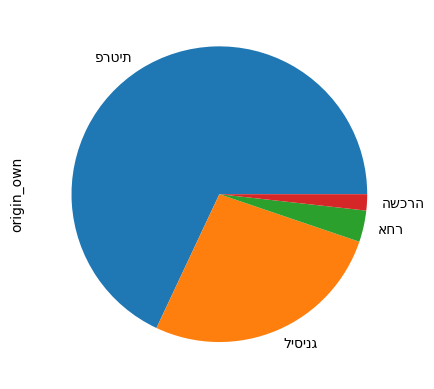

In [145]:
df_all["origin_own"].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='gear_type'>

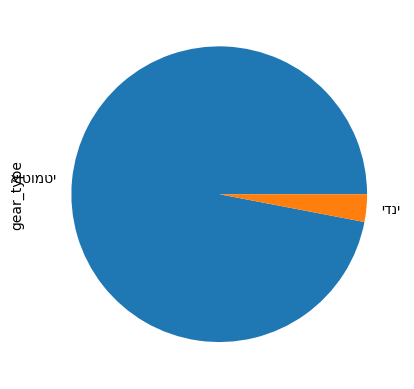

In [146]:
df_all["gear_type"].value_counts().plot(kind='pie')

<AxesSubplot:>

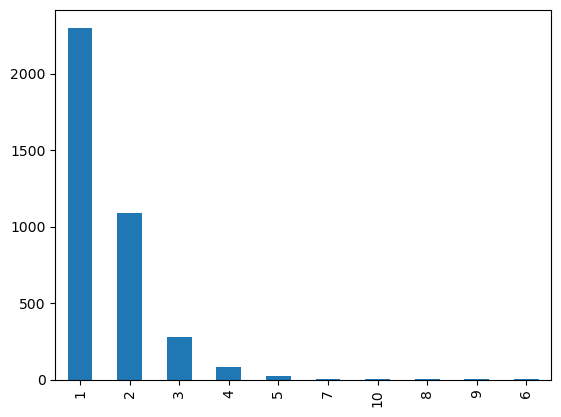

In [147]:
df_all["owner_num"].value_counts().plot(kind='bar')

In [148]:
df_all.gear_type.describe()

count        3782
unique          2
top       אוטומטי
freq         3668
Name: gear_type, dtype: object

In [164]:
df_all.describe(include = 'all')

,price,location,version,year,engine,km,owner_num,gear_type,color,origin_own,nxt_test,test_cost
count,2572,2572,2572,2572.000000,2572,2572,2572.000000,2572,2572,2572,2572,2572
unique,696,50,803,NaN,153,904,NaN,2,73,4,13,28
top,"105,000 ₪",ראשון לציון,קיה ספורטז' SPORTAGE URBAN,NaN,1998 ליטר בנזין,"130,000",NaN,אוטומטי,שנהב לבן,פרטית,1 חודשים,"1,604 ₪"
freq,29,397,95,NaN,218,54,NaN,2496,850,1696,370,407
mean,NaN,NaN,NaN,2017.870529,NaN,NaN,1.547434,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.871004,NaN,NaN,0.816309,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2003.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2016.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2019.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2020.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN


In [197]:
def clean_and_convert(s):
    s = s.replace(",", "").replace("₪", "")
    return int(s)

def clean_month_and_convert(s):
    s = s.replace("חודשים", "")
    return int(s)
def clean_km_convert(s):
    s = s.replace(",", "")
    return int(s)

In [198]:
df_all['km'] = df_all['km'].apply(clean_km_convert)
df_all['nxt_test'] = df_all['nxt_test'].apply(clean_month_and_convert)
df_all['price'] = df_all['price'].apply(clean_and_convert)
df_all['test_cost'] = df_all['test_cost'].apply(clean_and_convert)
df_all
#Converting data to int type for later use

,price,location,version,year,engine,km,owner_num,gear_type,color,origin_own,nxt_test,test_cost
0,138000,עפולה,מזדה CX-5 CX-5 PREMIUM,2018,1998 ליטר בנזין,55000,4,אוטומטי,אפור מטל,ליסינג,6,2019
2,115000,לוד,קיה ספורטז' SPORTAGE URBAN,2018,1999 ליטר בנזין,27000,3,אוטומטי,שחור,פרטית,4,1835
4,20000,כפר סבא,אופל אסטרה ASTRA ENJOY,2012,1598 ליטר בנזין,220000,2,אוטומטי,אפור,ליסינג,4,1262
5,143000,פתח תקווה,פולקסווגן טיגואן TIGUAN LIFE PLUS,2021,1498 ליטר בנזין,86000,1,אוטומטי,שחור מטלי,ליסינג,11,2417
6,97000,נתניה,יונדאי איוניק HYBRID PREMIUM,2019,1580 ליטר בנזין,85000,1,אוטומטי,שנהב לבן,ליסינג,4,1604
...,...,...,...,...,...,...,...,...,...,...,...,...
3775,77000,נתניה,סיאט איביזה IBIZA STYLE CP,2017,999 ליטר בנזין,150000,2,אוטומטי,שנהב לבן,פרטית,3,1102
3776,26999,פרדס חנה כרכור,סקודה קודיאק FL BUSINESS,2022,1498 ליטר בנזין,9000,1,אוטומטי,כסף מטלי,פרטית,1,2417
3777,104900,ראשון לציון,רנו מגאן MEGANE INTENSE,2019,1461 ליטר דיזל,80000,2,אוטומטי,שנהב לבן,ליסינג,5,1604
3778,155000,נתניה,קיה נירו NIRO EX,2017,1580 ליטר בנזין,90209,1,אוטומטי,כסף,פרטית,11,1424


In [212]:
print (df_all)
#granting each unique string its own number. most of the columns were not ran over
#in order to be able to understand the labling later on.
import seaborn as sns
import sklearn 
le = sklearn.preprocessing.LabelEncoder()
le.fit(df_all["version"])
df_all["version_num"] = le.transform(df_all["version"])
le.fit(df_all["color"])
df_all["color_num"] = le.transform(df_all["color"])
le.fit(df_all["engine"])
df_all["engine_num"] = le.transform(df_all["engine"])
le.fit(df_all["location"])
df_all["location_num"] = le.transform(df_all["location"])  
le.fit(df_all["gear_type"])
df_all["gear_type"] = le.transform(df_all["gear_type"])
#For gear type "0": mean auto and 1: means manual
le.fit(df_all["origin_own"])
df_all["origin_own_num"] = le.transform(df_all["origin_own"])
df_all.to_csv("extanded_info.csv")


,price,location,version,year,engine,km,owner_num,gear_type,color,origin_own,nxt_test,test_cost,version_num
0,138000,עפולה,מזדה CX-5 CX-5 PREMIUM,2018,1998 ליטר בנזין,55000,4,אוטומטי,אפור מטל,ליסינג,6,2019,363
2,115000,לוד,קיה ספורטז' SPORTAGE URBAN,2018,1999 ליטר בנזין,27000,3,אוטומטי,שחור,פרטית,4,1835,735
4,20000,כפר סבא,אופל אסטרה ASTRA ENJOY,2012,1598 ליטר בנזין,220000,2,אוטומטי,אפור,ליסינג,4,1262,47
5,143000,פתח תקווה,פולקסווגן טיגואן TIGUAN LIFE PLUS,2021,1498 ליטר בנזין,86000,1,אוטומטי,שחור מטלי,ליסינג,11,2417,642
6,97000,נתניה,יונדאי איוניק HYBRID PREMIUM,2019,1580 ליטר בנזין,85000,1,אוטומטי,שנהב לבן,ליסינג,4,1604,283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,77000,נתניה,סיאט איביזה IBIZA STYLE CP,2017,999 ליטר בנזין,150000,2,אוטומטי,שנהב לבן,פרטית,3,1102,547
3776,26999,פרדס חנה כרכור,סקודה קודיאק FL BUSINESS,2022,1498 ליטר בנזין,9000,1,אוטומטי,כסף מטלי,פרטית,1,2417,617
3777,104900,ראשון לציון,רנו מגאן MEGANE INTENSE,2019,1461 ליטר דיזל,80000,2,אוטומטי,שנהב לבן,ליסינג,5,1604,750
3778,155000,נתניה,קיה נירו NIRO EX,2017,1580 ליטר בנזין,90209,1,אוטומטי,כסף,פרטית,11,1424,714


In [225]:
df_all

,price,location,version,year,engine,km,owner_num,gear_type,color,origin_own,nxt_test,test_cost,version_num,color_num,engine_num,location_num,origin_own_num
0,138000,עפולה,מזדה CX-5 CX-5 PREMIUM,2018,1998 ליטר בנזין,55000,4,0,אפור מטל,ליסינג,6,2019,363,13,82,32,2
2,115000,לוד,קיה ספורטז' SPORTAGE URBAN,2018,1999 ליטר בנזין,27000,3,0,שחור,פרטית,4,1835,735,65,84,21,3
4,20000,כפר סבא,אופל אסטרה ASTRA ENJOY,2012,1598 ליטר בנזין,220000,2,0,אפור,ליסינג,4,1262,47,6,53,19,2
5,143000,פתח תקווה,פולקסווגן טיגואן TIGUAN LIFE PLUS,2021,1498 ליטר בנזין,86000,1,0,שחור מטלי,ליסינג,11,2417,642,67,39,35,2
6,97000,נתניה,יונדאי איוניק HYBRID PREMIUM,2019,1580 ליטר בנזין,85000,1,0,שנהב לבן,ליסינג,4,1604,283,70,44,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,77000,נתניה,סיאט איביזה IBIZA STYLE CP,2017,999 ליטר בנזין,150000,2,0,שנהב לבן,פרטית,3,1102,547,70,151,28,3
3776,26999,פרדס חנה כרכור,סקודה קודיאק FL BUSINESS,2022,1498 ליטר בנזין,9000,1,0,כסף מטלי,פרטית,1,2417,617,49,39,34,3
3777,104900,ראשון לציון,רנו מגאן MEGANE INTENSE,2019,1461 ליטר דיזל,80000,2,0,שנהב לבן,ליסינג,5,1604,750,70,29,38,2
3778,155000,נתניה,קיה נירו NIRO EX,2017,1580 ליטר בנזין,90209,1,0,כסף,פרטית,11,1424,714,46,44,28,3


In [228]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'relative frequency')

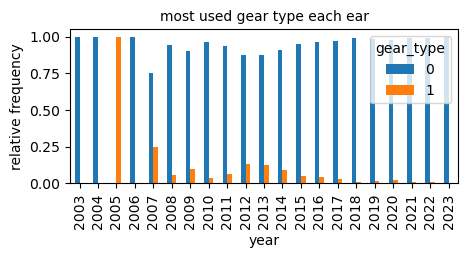

In [232]:
ct=pd.crosstab(df_all['year'],df_all['gear_type'],normalize= 'index')
ct.plot(kind = 'bar' , figsize = (5,2))
plt.title("most used gear type each ear", fontsize = 10)
plt.xlabel('year')
plt.ylabel('relative frequency')
#We can clearly see that most of the manual cars origenated in 20o5

Text(0, 0.5, 'relative frequency')

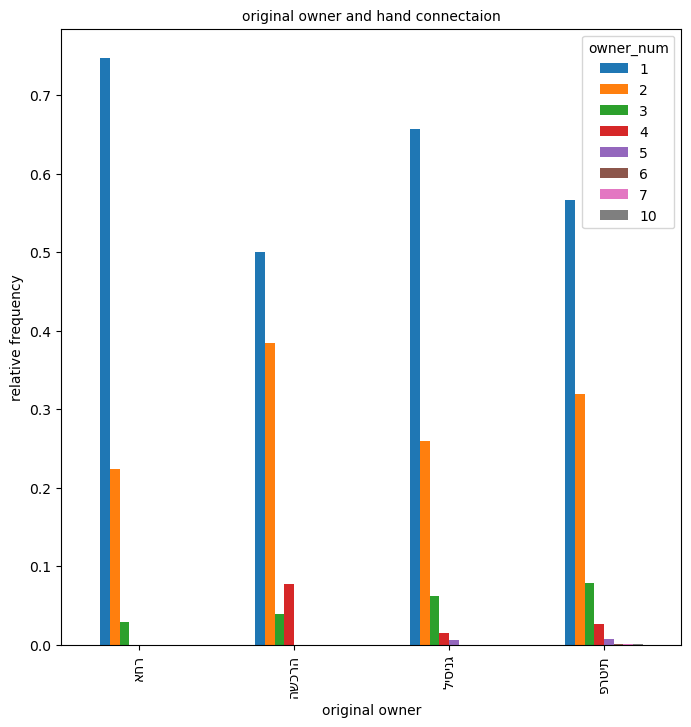

In [237]:
ct2=pd.crosstab(df_all['origin_own'],df_all['owner_num'],normalize= 'index')
ct2.plot(kind = 'bar' , figsize = (8,8))
plt.title("original owner and hand connectaion", fontsize = 10)
plt.xlabel('original owner')
plt.ylabel('relative frequency')

Text(0, 0.5, 'relative frequency')

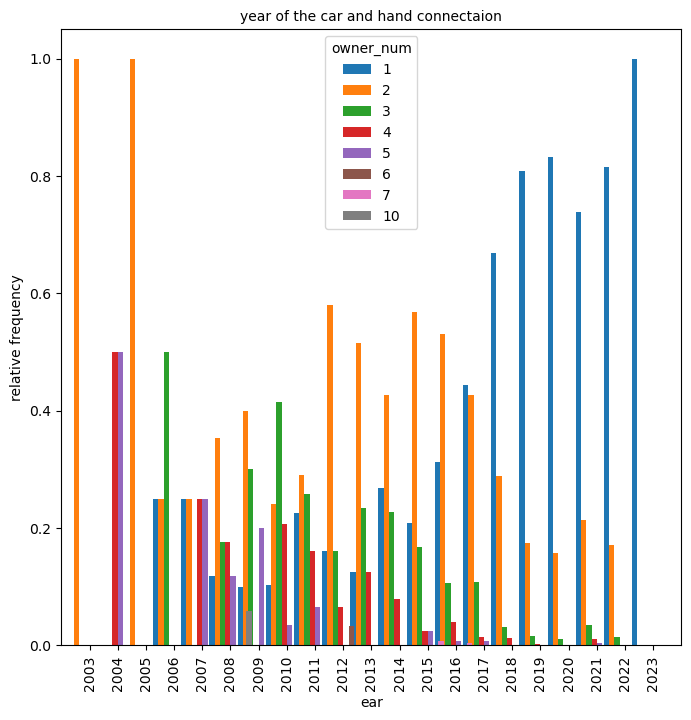

In [270]:
ct2=pd.crosstab(df_all['year'],df_all['owner_num'],normalize= 'index')
ct2.plot(kind = 'bar' , figsize = (8,8), width = 1.5)
plt.title("year of the car and hand connectaion", fontsize = 10)
plt.xlabel('ear')
plt.ylabel('relative frequency')
#we can see that depending on the year a car might been passed more or less times between owners

In [271]:
from scipy.stats import chi2_contingency
ct_year=pd.crosstab(df_all['year'],df_all['owner_num'])
chi2_contingency(ct_year)
#Using chi test we can clearly see that is a connaction between the year of the can and it's hand

(1348.076915810968,
 1.8263035191826016e-196,
 140,
 array([[5.97978227e-01, 2.99766719e-01, 7.11508554e-02, 2.29393468e-02,
         6.60964230e-03, 3.88802488e-04, 7.77604977e-04, 3.88802488e-04],
        [1.19595645e+00, 5.99533437e-01, 1.42301711e-01, 4.58786936e-02,
         1.32192846e-02, 7.77604977e-04, 1.55520995e-03, 7.77604977e-04],
        [5.97978227e-01, 2.99766719e-01, 7.11508554e-02, 2.29393468e-02,
         6.60964230e-03, 3.88802488e-04, 7.77604977e-04, 3.88802488e-04],
        [2.39191291e+00, 1.19906687e+00, 2.84603421e-01, 9.17573872e-02,
         2.64385692e-02, 1.55520995e-03, 3.11041991e-03, 1.55520995e-03],
        [2.39191291e+00, 1.19906687e+00, 2.84603421e-01, 9.17573872e-02,
         2.64385692e-02, 1.55520995e-03, 3.11041991e-03, 1.55520995e-03],
        [1.01656299e+01, 5.09603421e+00, 1.20956454e+00, 3.89968896e-01,
         1.12363919e-01, 6.60964230e-03, 1.32192846e-02, 6.60964230e-03],
        [5.97978227e+00, 2.99766719e+00, 7.11508554e-01, 2.2939346

Text(0, 0.5, 'Frequency')

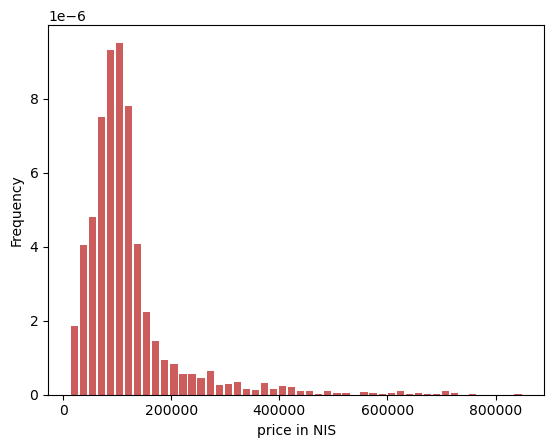

In [256]:
df_all.price.hist(bins=50, density=True, rwidth=0.8, color='IndianRed', grid=False)
plt.xlabel('price in NIS')
plt.ylabel('Frequency')
#We can see what is the most frequent price range 

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='owner_num'>

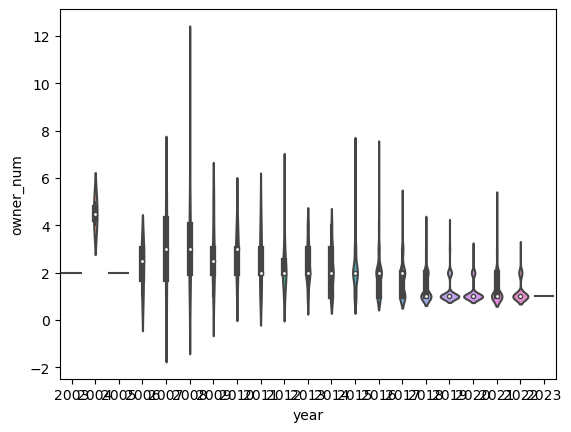

In [264]:
sns.violinplot(df_all.year,df_all.owner_num) 
#Trying to establish connection between the year of the car to the hands it have been passed through

<AxesSubplot:xlabel='year'>

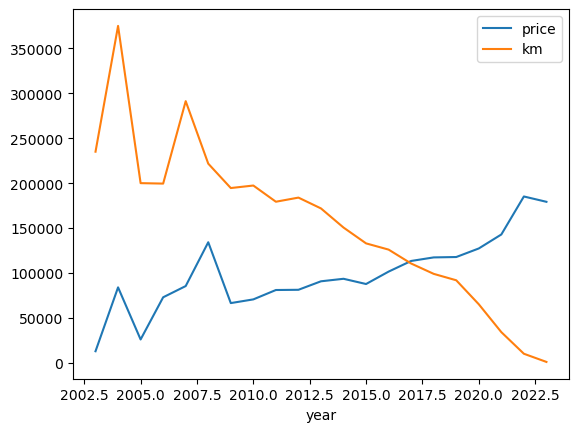

In [285]:
multigraph=df_all.groupby(['year']).mean()[['price','km']]
multigraph.plot()
#Scattering of miilage and price over the years

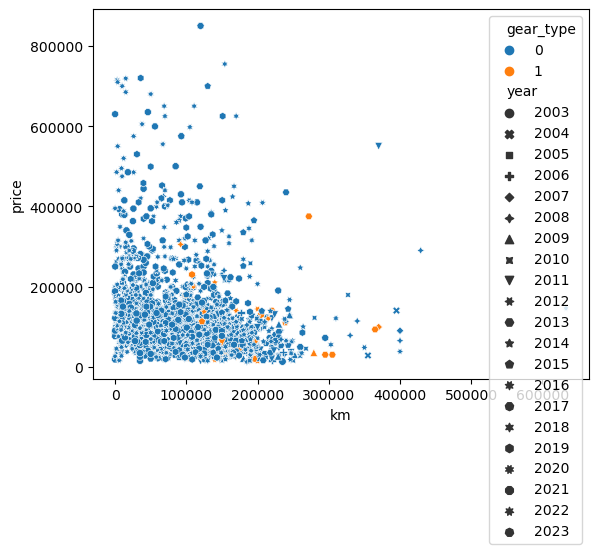

In [301]:
sns.scatterplot(x = 'km', y = 'price', s = 30, hue = 'gear_type', style = 'year', data = df_all);
#After a close incpection and great zooming in we were able to determin
#That earlier manual care had avraged at lower prices and higher Millage

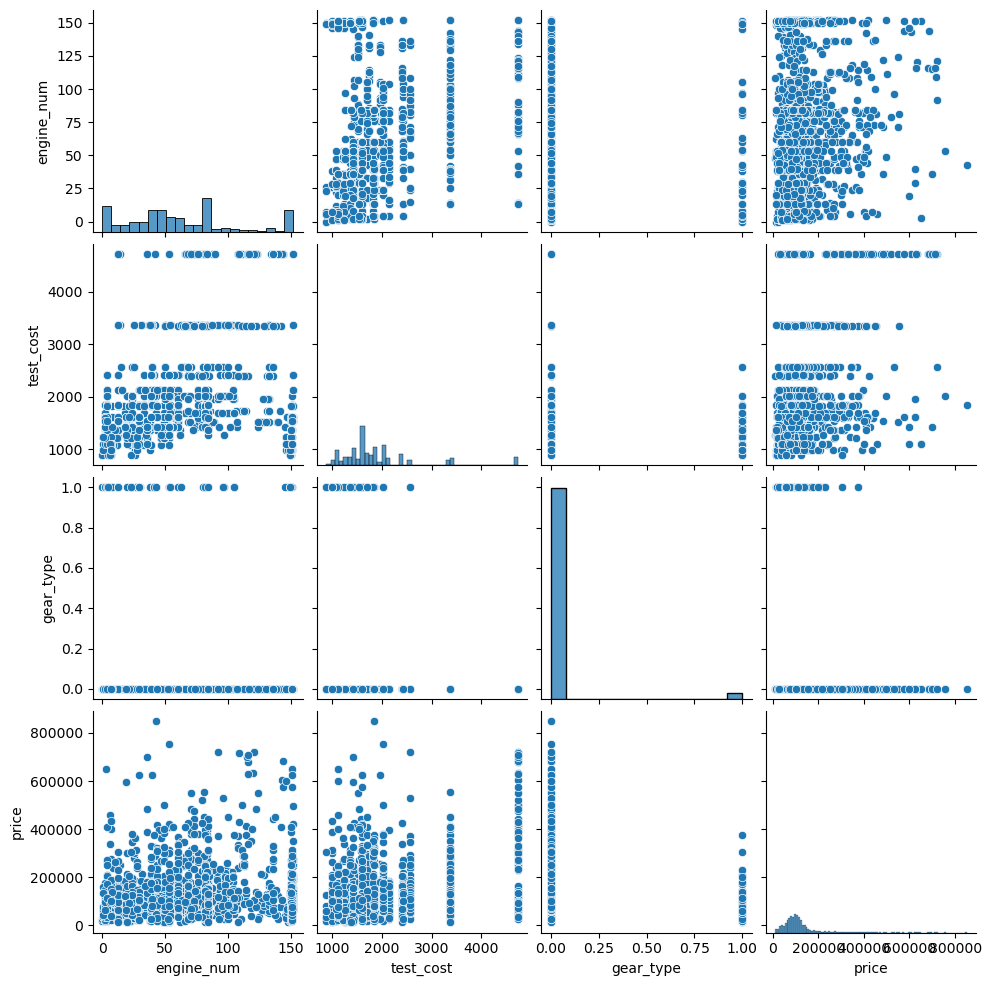

In [305]:
sns.pairplot(df_all[['engine_num','test_cost', 'gear_type', 'price']])
#throgh these scheme we can see some obvius connection for example the test cost to the price of the car. 

<AxesSubplot:>

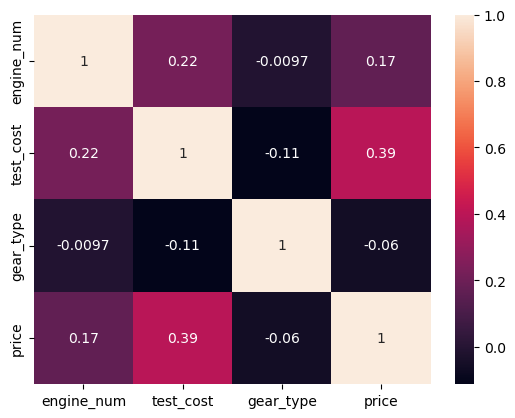

In [306]:
Heatmap = pd.DataFrame(df_all, columns = ['engine_num','test_cost', 'gear_type', 'price'])
sns.heatmap(Heatmap.corr(), annot=True)

In [307]:
df_all = pd.read_csv('extanded_info.csv')
df_all

,Unnamed: 0,price,location,version,year,engine,km,owner_num,gear_type,color,origin_own,nxt_test,test_cost,version_num,color_num,engine_num,location_num
0,0,138000,עפולה,מזדה CX-5 CX-5 PREMIUM,2018,1998 ליטר בנזין,55000,4,0,אפור מטל,ליסינג,6,2019,363,13,82,32
1,2,115000,לוד,קיה ספורטז' SPORTAGE URBAN,2018,1999 ליטר בנזין,27000,3,0,שחור,פרטית,4,1835,735,65,84,21
2,4,20000,כפר סבא,אופל אסטרה ASTRA ENJOY,2012,1598 ליטר בנזין,220000,2,0,אפור,ליסינג,4,1262,47,6,53,19
3,5,143000,פתח תקווה,פולקסווגן טיגואן TIGUAN LIFE PLUS,2021,1498 ליטר בנזין,86000,1,0,שחור מטלי,ליסינג,11,2417,642,67,39,35
4,6,97000,נתניה,יונדאי איוניק HYBRID PREMIUM,2019,1580 ליטר בנזין,85000,1,0,שנהב לבן,ליסינג,4,1604,283,70,44,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,3775,77000,נתניה,סיאט איביזה IBIZA STYLE CP,2017,999 ליטר בנזין,150000,2,0,שנהב לבן,פרטית,3,1102,547,70,151,28
2568,3776,26999,פרדס חנה כרכור,סקודה קודיאק FL BUSINESS,2022,1498 ליטר בנזין,9000,1,0,כסף מטלי,פרטית,1,2417,617,49,39,34
2569,3777,104900,ראשון לציון,רנו מגאן MEGANE INTENSE,2019,1461 ליטר דיזל,80000,2,0,שנהב לבן,ליסינג,5,1604,750,70,29,38
2570,3778,155000,נתניה,קיה נירו NIRO EX,2017,1580 ליטר בנזין,90209,1,0,כסף,פרטית,11,1424,714,46,44,28


In [308]:
from sklearn import linear_model
plt.rcParams['figure.figsize'] = (10, 6)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#neccasery improts for linear reggresion.

In [337]:
info = pd.read_csv('extanded_info.csv',index_col=0) #load data
info = info.drop('version',axis = 1)
info = info.drop('engine',axis = 1)
info = info.drop('color',axis = 1)
info = info.drop('origin_own',axis = 1)
info = info.drop('location',axis = 1)

In [339]:
info.to_csv("numeric_table.csv")

In [341]:
info=pd.read_csv("numeric_table.csv")
info

,Unnamed: 0,price,year,km,owner_num,gear_type,nxt_test,test_cost,version_num,color_num,engine_num,location_num
0,0,138000,2018,55000,4,0,6,2019,363,13,82,32
1,2,115000,2018,27000,3,0,4,1835,735,65,84,21
2,4,20000,2012,220000,2,0,4,1262,47,6,53,19
3,5,143000,2021,86000,1,0,11,2417,642,67,39,35
4,6,97000,2019,85000,1,0,4,1604,283,70,44,28
...,...,...,...,...,...,...,...,...,...,...,...,...
2567,3775,77000,2017,150000,2,0,3,1102,547,70,151,28
2568,3776,26999,2022,9000,1,0,1,2417,617,49,39,34
2569,3777,104900,2019,80000,2,0,5,1604,750,70,29,38
2570,3778,155000,2017,90209,1,0,11,1424,714,46,44,28


In [342]:
m=linear_model.LinearRegression().fit(info.iloc[:,0:1],info.iloc[:,3:])

C:\Users\User\AppData\Local\Temp\ipykernel_67360\654377902.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(info['version_num'],m.predict(info.iloc[:,0:1]),'k',color='blue',linewidth=3)


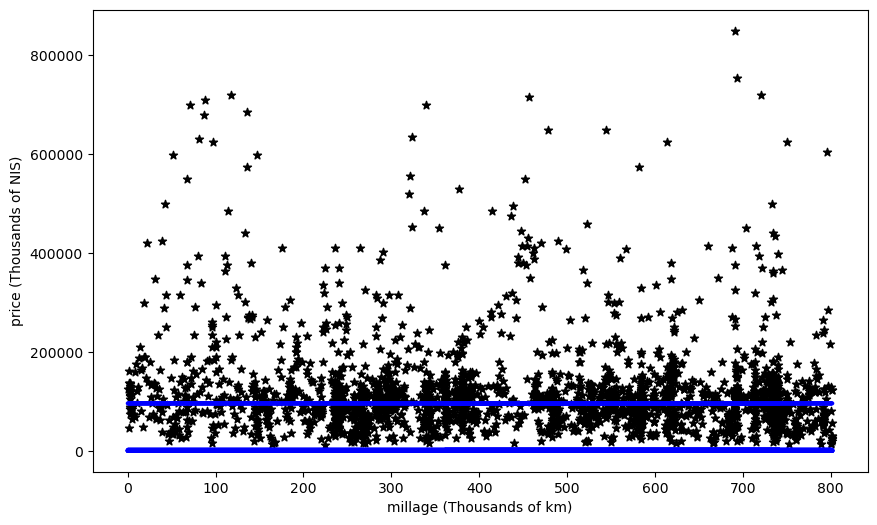

In [345]:
plt.scatter(x=info['version_num'],y=info['price'],c='k',marker='*',label='version_num')
plt.plot(info['version_num'],m.predict(info.iloc[:,0:1]),'k',color='blue',linewidth=3)

plt.xlabel('millage (Thousands of km)')
plt.ylabel('price (Thousands of NIS)')
plt.show()

In [346]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('numeric_table.csv')

# Split the data into training and testing sets
X = data.drop('price', axis=1)  # drop the 'price' column to get the predictors
y = data['price']  # get the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print("R-squared score on testing set:", score)

R-squared score on testing set: 0.2123011241255507


In [364]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Load the dataset
data = pd.read_csv('numeric_table.csv')

# Split the data into training and testing sets
X = data.drop('price', axis=1)  # drop the 'price' column to get the predictors
y = data['price']  # get the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a KNN Regressor model
model = KNeighborsRegressor(n_neighbors=11)
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print("R-squared score on testing set:", score)

R-squared score on testing set: 0.1829468154658026


In [357]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('numeric_table.csv')

# Split the data into training and testing sets
X = data.drop('price', axis=1)  # drop the 'price' column to get the predictors
y = data['price']  # get the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print("R-squared score on testing set:", score)

R-squared score on testing set: 0.45739962882168106


In [359]:
predict_v_real = pd.DataFrame({"Real Price" : y_test , "Prediction" : y_pred})
predict_v_real["Prediction difference"] = abs(predict_v_real["Real Price"] - predict_v_real["Prediction"])
predict_v_real


,Real Price,Prediction,Prediction difference
1127,115000,119526.22,4526.22
2119,95000,120068.84,25068.84
2337,402453,130266.05,272186.95
367,109000,91999.40,17000.60
1780,139900,99798.45,40101.55
...,...,...,...
930,72000,78957.00,6957.00
829,86900,88371.00,1471.00
25,114900,115569.50,669.50
2552,91900,134072.07,42172.07


Text(0.5, 0, 'Car Index')

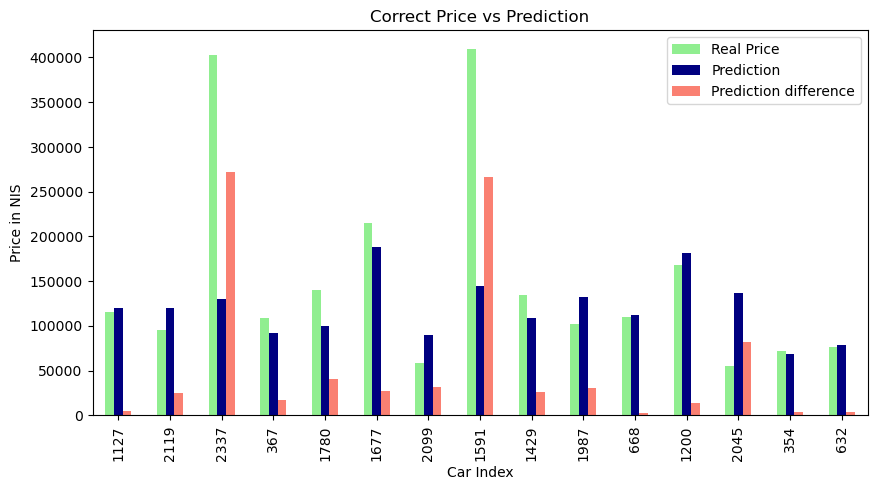

In [363]:
predict_v_real.head(15).plot(kind = 'bar' , figsize = (10,5) , color= ['lightgreen' , 'navy' , 'salmon'])
plt.title("Correct Price vs Prediction")
plt.ylabel("Price in NIS")
plt.xlabel("Car Index")